In [1]:
# Importa bibliotecas necessarias 
import numpy as np
import urllib
import pandas as pd
from sklearn import tree
from sklearn import  model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from IPython.display import display
import pydotplus
from sklearn.preprocessing import LabelEncoder

/home/svncjus/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
dataset = pd.read_csv('abalone.data', sep=",", header=None)
dataset.columns = ["sex", "length", "diameter", "height","whole height","shucked weight","viscera weight","shell weight","rings"]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole height    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


dataset.groupby(['rings']).count()

In [5]:
dataset.head()

,sex,length,diameter,height,whole height,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
# Imprime quantide de instancias e atributos da base
print("Instancias e atributos")
print(dataset.shape)

Instancias e atributos
(4177, 9)


In [7]:
for label in dataset.columns:
    dataset[label] = LabelEncoder().fit(dataset[label]).transform(dataset[label])

In [8]:
dataset=dataset.to_numpy()

In [9]:
print(dataset)

[[  2  66  56 ... 199 263  14]
 [  2  45  36 ...  94 113   6]
 [  0  81  67 ... 280 374   8]
 ...
 [  2  95  78 ... 571 550   8]
 [  0 100  80 ... 518 530   9]
 [  2 117  94 ... 732 813  11]]


In [10]:
X = dataset[:,1:8]
y = dataset[:,0]

In [11]:
# EXEMPLO USANDO HOLDOUT
# Holdout -> dividindo a base em treinamento (70%) e teste (30%), estratificada
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42)

In [12]:
# declara o classificador
clfa = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [13]:
# treina o classificador
clfa = clfa.fit(X_train, y_train)

In [14]:
#testa usando a base de testes
predicted=clfa.predict(X_test)

In [15]:
# calcula a acuracia na base de teste (taxa de acerto)
score=clfa.score(X_test, y_test)

In [16]:
# calcula a matriz de confusao
matrix = confusion_matrix(y_test, predicted)

In [17]:
# apresenta os resultados
print("\nResultados baseados em Holdout 70/30")
print("Taxa de acerto = %.2f " % score)
print("Matriz de confusao:")
print(matrix)


Resultados baseados em Holdout 70/30
Taxa de acerto = 0.56 
Matriz de confusao:
[[118  75 184]
 [ 34 346  39]
 [101 123 234]]


In [18]:
# EXEMPLO USANDO VALIDACAO CRUZADA
clfb = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
folds=5
result = model_selection.cross_val_score(clfb, X, y, cv=folds)

In [19]:
print("\nResultados baseados em Validacao Cruzada")
print("Qtde folds: %d:" % folds)
print("Taxa de Acerto: %.2f" % result.mean())
print("Desvio padrao: %.2f" % result.std())


Resultados baseados em Validacao Cruzada
Qtde folds: 5:
Taxa de Acerto: 0.54
Desvio padrao: 0.03


In [20]:
# matriz de confusão da validacao cruzada
Z = model_selection.cross_val_predict(clfb, X, y, cv=folds)
cm=confusion_matrix(y, Z)
print("Matriz de confusao:")
print(cm)

Matriz de confusao:
[[ 354  259  694]
 [  58 1060  224]
 [ 332  366  830]]



Arvore gerada no experimento baseado em Holdout


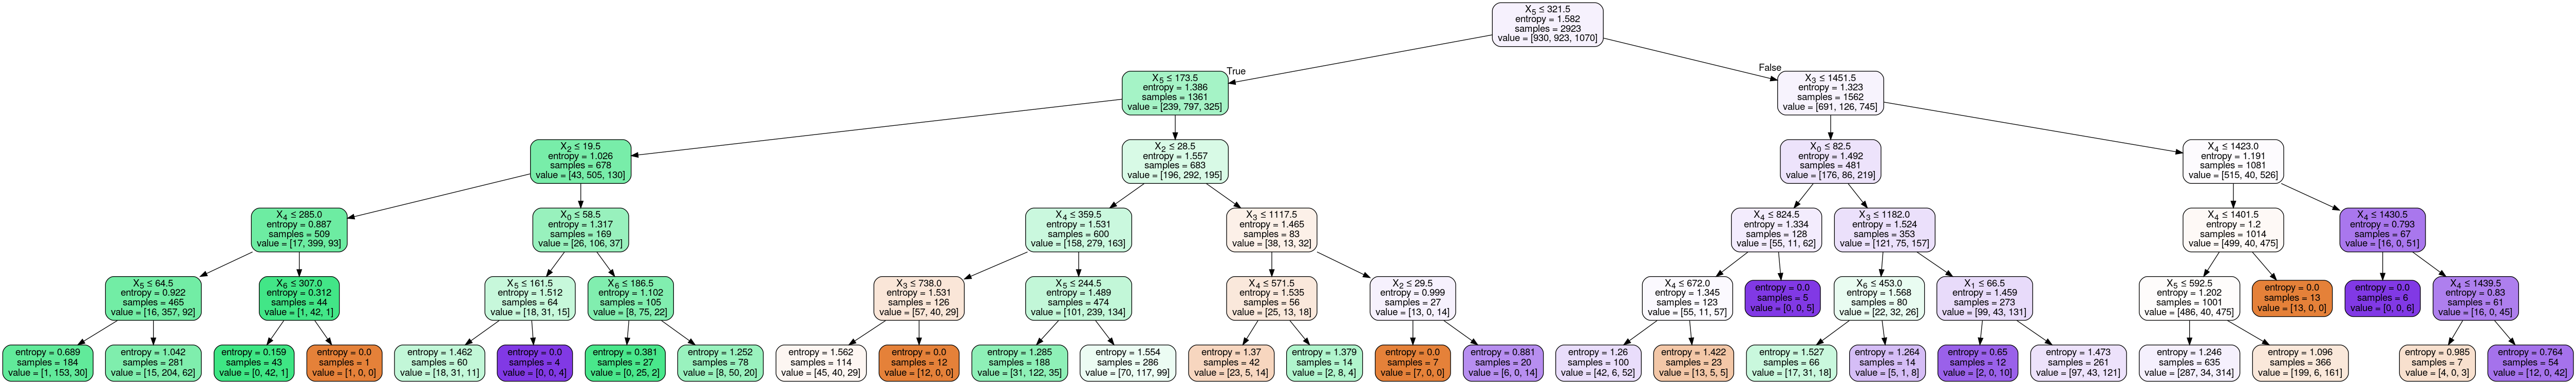

In [21]:
#imprime a arvore gerada
print("\nArvore gerada no experimento baseado em Holdout")
dot_data = StringIO()
export_graphviz(clfa, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
im=Image(graph.create_png())
display(im)
